In [1]:
from dataloader import *
from torchvision import transforms
from torchvision.models import *
import matplotlib.pyplot as plt
import torchvision.models as models
from torchvision import transforms
from dataloader import *
import numpy as np
import torch
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
import torch.optim as optim
from tqdm import tqdm
from torch.utils.tensorboard import SummaryWriter
import torchvision
import wandb
from arch import *
import os
import warnings
warnings.filterwarnings("ignore")

In [8]:
# With square kernels and equal stride
m = nn.ConvTranspose2d(16, 33, 3, stride=2)
# non-square kernels and unequal stride and with padding
input = torch.randn(20, 16, 50, 100)
output = m(input)
output.size()

torch.Size([20, 33, 101, 201])

In [28]:
preprocess_in = transforms.Compose([
    transforms.ToTensor(),
    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.Resize((66, 256)),
    #Resnet50()
])

In [29]:
tr_loader = winterdata("../signals/data/signal dataset", preprocess_in)
#tra, val = random_split(tr_loader, [int(len(tr_loader) * 0.8), int(len(tr_loader) * 0.2)])
tra = torch.utils.data.Subset(tr_loader, (range(0, int(len(tr_loader) * 0.8))))
val = torch.utils.data.Subset(tr_loader, (range(int(len(tr_loader) * 0.8), len(tr_loader))))


train_loader = DataLoader(dataset = tra, batch_size = 10, shuffle = True)
val_loader = DataLoader(dataset = val, batch_size = 1, shuffle = False)


model = half_UNet((66, 256), out_channels = 3)

torch.Size([10, 3])
tensor([[ 4,  0,  0],
        [ 9,  0,  0],
        [ 4,  7,  0],
        [ 6,  1,  0],
        [ 1,  0,  0],
        [15,  0,  0],
        [ 4,  1,  0],
        [ 0,  0,  0],
        [11,  0,  0],
        [10,  2,  0]])
tensor([[ 0.0136, -0.0069, -0.0076],
        [ 0.0136, -0.0069, -0.0076],
        [ 0.0136, -0.0069, -0.0076],
        [ 0.0136, -0.0069, -0.0076],
        [ 0.0136, -0.0069, -0.0076],
        [ 0.0136, -0.0069, -0.0076],
        [ 0.0136, -0.0069, -0.0076],
        [ 0.0136, -0.0069, -0.0076],
        [ 0.0136, -0.0069, -0.0076],
        [ 0.0136, -0.0069, -0.0076]], grad_fn=<SqueezeBackward1>)


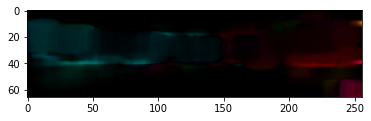

In [30]:
for batch in train_loader:
    out = model.eval()(batch['image'])
    print(out.shape)
    #print(len(batch['label'].view(32,3)))
    print(batch['label'])
    print(out)
    plt.imshow(batch['image'][0].permute(1, 2, 0))
    plt.show()
    break